<a href="https://colab.research.google.com/github/hassantorkaman/ML-Projects/blob/https%2Fgithub.com%2Fhassantorkaman/Amino%20Acids%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import datetime
from sklearn.metrics import accuracy_score, classification_report

# **1- Data PreProcessing**


**Merging all datasets into one**


There are 6 datasets:

1- 20 labeled from 414

2- 20 labeled from 622

3- 25 labeled from 587

4- 21 labeled from 618

5- 17 labeled from 441

6- 33 labeled from 559

Total: 3241 rows

Total Labeled: 136

Labeled Percentage: 4.19%

**Import Datasets and save them on colab:**

I have imported these datasets into colab using this code:

      from google.colab import files

      uploaded = files.upload()

# Load Excel files into DataFrames
Then I loaded them into 6 different dataframes and finally merged them into one dataframe using this code:


    df1 = pd.read_excel('11.xlsx')
    df2 = pd.read_excel('22.xlsx')
    df3 = pd.read_excel('33.xlsx')
    df4 = pd.read_excel('44.xlsx')
    df5 = pd.read_excel('55.xlsx')
    df6 = pd.read_excel('66.xlsx')

    final_df = pd.concat([df1, df2, df3, df4, df5,df6], ignore_index=True)

Next Step I filled the empty labels cells with 0 , saved and downloaded this file as new data set which includes all our 6 dataset with labels

    final_df['label'] = final_df['label'].fillna(0)

# Save merged data to a new Excel file in Colab
Finaly I saved new dataset and download it to my comouter

    final_df.to_excel('/content/final_df.xlsx', index=False)
    files.download('/content/final_df.xlsx')





# **1-1 Mounting Dataset Into Program**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
final_df = pd.read_csv('/content/drive/MyDrive/reza_datasets/final_csv.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1-2 Visualization of the Raw Dataset**:

**1-2-1 Take a look at the dataset:**

In [4]:
final_df.head()

,Unnamed: 0,Chain,Residue Name,AT,DPX,ASA,Average Bfactor,CX,RMSF,kdHydrophobicity,label
0,0,E,VAL,7,0.00,93.199997,27.312,6.890000,0.819,4.2,0
1,1,E,SER,6,0.00,45.600002,31.505,5.820000,0.525,-0.8,0
2,2,E,ALA,5,2.69,4.800000,28.328,3.250000,0.763,1.8,0
3,3,E,TYR,12,1.47,118.199997,31.080,14.290001,0.408,-1.3,0
4,4,E,LEU,8,8.08,33.299999,25.937,2.710000,0.426,3.8,1


**1-2-2 :In This visualization we can see the corelation between all attributes and the Label :**

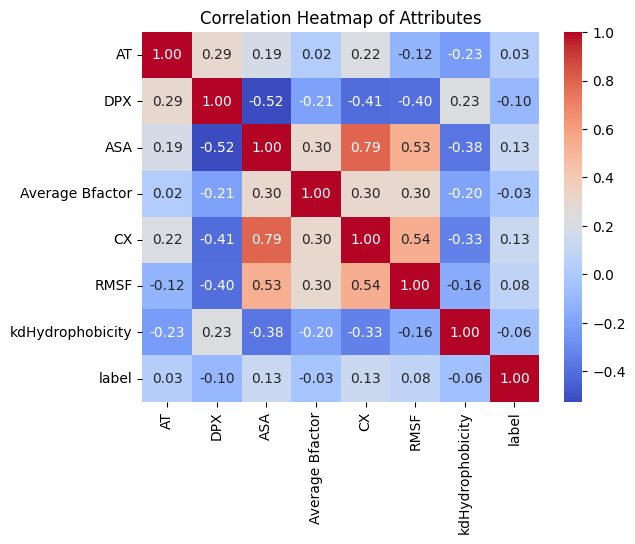

In [5]:
attribute_columns = ['AT', 'DPX', 'ASA', 'Average Bfactor', 'CX', 'RMSF', 'kdHydrophobicity', 'label']

correlation_matrix = final_df[attribute_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Attributes')
plt.show()


In [6]:
x= final_df.iloc[: ,3:10]
y= final_df.iloc[:, -1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=16, stratify=y)


**1-3 Normalisation the values**

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range = (0,1))
X_train_norm= sc.fit_transform(X_train)
X_test_norm= sc.fit_transform(X_test)


**1-4 Imbalance Augmantation Techniques**

**1-4-1 - SMOTE**

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 16)
X_train_smote, y_train_smote = smote.fit_resample(X_train_norm,y_train)


In [10]:
print(len(x))
print(len(X_train))
print(len(X_test))
print(len(y))
print(len(y_train))
print(len(X_train_norm))
print(len(X_test))
print(len(y_test))
print(len(X_train_smote))
print(len(y_train_smote))

3241
2592
649
3241
2592
2592
649
649
4966
4966


# **2- Classic Machine Learning Models **

# **2-1 Random Forest**
  
  **2-1-1 Finding Best hyperparametrs for Random forest classifier**


I used Gridsearch to find best hyper parameters for random forest model, becuase this part is time consming, I made it comment and will use these parameters directly in the model in next steps

In following you can see the code which has been used for gaining best hyper parameters:

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    rf_classifier = RandomForestClassifier(random_state=16)
    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 150],        # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
        'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
    }



    # Create GridSearchCV for finding best parameters
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_norm, y_train)

    best_params = grid_search.best_params_
    best_rf_model = grid_search.best_estimator_

    print("Best Hyperparameters:", best_params)

# **2-1-1 With Orginal Data**

**Trainin Random Forest Classifier**


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1,'min_samples_split': 5, 'n_estimators': 150}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_classifier = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=150,
    random_state=16
)
rf_classifier.fit(X_train, y_train)
rf_classifier_prediction = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, rf_classifier_prediction)
print("Accuracy:", accuracy)

precision = precision_score(y_test, rf_classifier_prediction)
print("Precision:", precision)

recall = recall_score(y_test, rf_classifier_prediction)
print("Recall:", recall)

f1 = f1_score(y_test, rf_classifier_prediction)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, rf_classifier_prediction)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9583975346687211
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[622   0]
 [ 27   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Result Analyzing for random forest with original dataset:**

Precision: Precision is 0, which indicates that the model did not correctly predict any positive instances (class 1).

Recall: Recall is also 0, indicating that the model did not capture any of the actual positive instances.


Confusion Matrix:

True Positives (TP): 0
True Negatives (TN): 622
False Positives (FP): 0
False Negatives (FN): 27
Given the high accuracy and a confusion matrix with no false positives and true negatives, it shows that the dataset is heavily imbalanced. The model predicted the majority class (class 0) for all samples.


# **2-1-2 With Normalized Orginal Data**


In [ ]:
rf_classifier = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=150,
    random_state=16
)
rf_classifier.fit(X_train_norm, y_train)
rf_classifier_prediction = rf_classifier.predict(X_test_norm)

accuracy = accuracy_score(y_test, rf_classifier_prediction)
print("Accuracy:", accuracy)

precision = precision_score(y_test, rf_classifier_prediction)
print("Precision:", precision)

recall = recall_score(y_test, rf_classifier_prediction)
print("Recall:", recall)

f1 = f1_score(y_test, rf_classifier_prediction)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, rf_classifier_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9583975346687211
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[622   0]
 [ 27   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Analyzing Result:**

Rubbish

# **2-1-3 With SMOTE data**

In [ ]:
rf_classifier = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=150,
    random_state=16
)
rf_classifier.fit(X_train_smote, y_train_smote)
rf_classifier_prediction_smote = rf_classifier.predict(X_test_norm)

accuracy = accuracy_score(y_test, rf_classifier_prediction_smote)
print("Accuracy:", accuracy)

precision = precision_score(y_test, rf_classifier_prediction_smote)
print("Precision:", precision)

recall = recall_score(y_test, rf_classifier_prediction_smote)
print("Recall:", recall)

f1 = f1_score(y_test, rf_classifier_prediction_smote)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, rf_classifier_prediction_smote)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, rf_classifier_prediction_smote)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

Accuracy: 0.8551617873651772
Precision: 0.05333333333333334
Recall: 0.14814814814814814
F1 Score: 0.0784313725490196
Confusion Matrix:
[[551  71]
 [ 23   4]]
True Positives (TP): 4
False Positives (FP): 71
True Negatives (TN): 551
False Negatives (FN): 23


**Analyzing the result : Still same shit**

Precision: Precision is very low at 5%. This means that out of all instances predicted as positive, only 5% are actually positive. This low precision suggests a high number of false positives.

Recall: Recall is 14.81%. This metric indicates that the model identified 11.11% of all the actual positive instances. In other words, the model missed 88.89% of the positive instances, which is quite high.

F1 Score: The F1 score is a harmonic mean of precision and recall. it's low at 7.83%. This indicates that the model's ability to balance precision and recall is poor.

Confusion Matrix:

True Positives (TP): 4 instances were correctly classified as positive.
False Positives (FP): 71 instances were incorrectly classified as positive.
True Negatives (TN): 551 instances were correctly classified as negative.
False Negatives (FN): 23 instances were incorrectly classified as negative.


# **2-1-4 -Random Undersampling**  



In [ ]:

from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling to the training data

undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_norm, y_train)


rf_classifier = RandomForestClassifier(max_depth=None,
                                       min_samples_leaf=1,
                                       min_samples_split=5,
                                       n_estimators=150,
                                       random_state=16
                                       )
rf_classifier.fit(X_train_undersampled, y_train_undersampled)


predictions = rf_classifier.predict(X_test_norm)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)





Accuracy: 0.576271186440678
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72       622
           1       0.08      0.81      0.14        27

    accuracy                           0.58       649
   macro avg       0.53      0.69      0.43       649
weighted avg       0.95      0.58      0.69       649

True Positives (TP): 22
False Positives (FP): 270
True Negatives (TN): 352
False Negatives (FN): 5


**Analyzing Result:**
This Mother fucker doesnt want to show something to us
with Random Undersampling we didn't get good result again as you can see, becuase the false positive increased exteremly

# **2-1-5 SMOTE with raw data without normalization**

In [ ]:


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote2, y_train_smote2 = smote.fit_resample(X_train, y_train)


rf_classifier = RandomForestClassifier(max_depth=None,
                                       min_samples_leaf=1,
                                       min_samples_split=5,
                                       n_estimators=150,
                                       random_state=16
                                       )

rf_classifier.fit(X_train_smote2,y_train_smote2)
predictions = rf_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy:", accuracy)
print("Classification Report:\n")
print(classification_report(y_test, predictions))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)







Accuracy: 0.9152542372881356
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       622
           1       0.03      0.04      0.04        27

    accuracy                           0.92       649
   macro avg       0.50      0.50      0.50       649
weighted avg       0.92      0.92      0.92       649

True Positives (TP): 1
False Positives (FP): 29
True Negatives (TN): 593
False Negatives (FN): 26


**Anylizing:**

Same shit as before

# Predict label for new values:

In [ ]:

def predict_label(AT, DPX, ASA, Average_Bfactor, CX, RMSF, kdHydrophobicity):
    # Create a DataFrame with user input
    user_input = pd.DataFrame({
        'AT': [AT],
        'DPX': [DPX],
        'ASA': [ASA],
        'Average Bfactor': [Average_Bfactor],
        'CX': [CX],
        'RMSF': [RMSF],
        'kdHydrophobicity': [kdHydrophobicity]
    })

    # Use the trained model for prediction
    prediction = best_rf_classifier.predict(user_input)

    # Output the prediction
    if prediction[0] == 1:
        print("The model predicts a positive label (1).")
    else:
        print("The model predicts a negative label (0).")

# Example usage
AT = float(input("Enter AT value: "))
DPX = float(input("Enter DPX value: "))
ASA = float(input("Enter ASA value: "))
Average_Bfactor = float(input("Enter Average Bfactor value: "))
CX = float(input("Enter CX value: "))
RMSF = float(input("Enter RMSF value: "))
kdHydrophobicity = float(input("Enter kdHydrophobicity value: "))

# Predict label based on user input
predict_label(AT, DPX, ASA, Average_Bfactor, CX, RMSF, kdHydrophobicity)


Enter AT value: 4
Enter DPX value: 15
Enter ASA value: 432
Enter Average Bfactor value: 42
Enter CX value: 4
Enter RMSF value: 0.3
Enter kdHydrophobicity value: 4
The model predicts a negative label (0).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# **2-2- SVM **

# **2-2-1 SVM with SMOTE**

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(class_weight='balanced', random_state=16)
svm_classifier.fit(X_train_smote, y_train_smote)
svm_prediction = svm_classifier.predict(X_test_norm )


accuracy = accuracy_score(y_test, svm_prediction)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svm_prediction)
print("Precision:", precision)

recall = recall_score(y_test, svm_prediction)
print("Recall:", recall)

f1 = f1_score(y_test, svm_prediction)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, svm_prediction)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, svm_prediction)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

Accuracy: 0.6563944530046225
Precision: 0.046296296296296294
Recall: 0.37037037037037035
F1 Score: 0.0823045267489712
Confusion Matrix:
[[416 206]
 [ 17  10]]
True Positives (TP): 10
False Positives (FP): 206
True Negatives (TN): 416
False Negatives (FN): 17


**Analysing the result:**
Better than random forest but still is not good enough

# **2-2-2 SVM with ADASYN**

In [ ]:
from imblearn.over_sampling import ADASYN


adasyn = ADASYN(random_state=16)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

svm_classifier_adasyn = SVC(class_weight='balanced', random_state=16)
svm_classifier_adasyn.fit(X_train_adasyn, y_train_adasyn)
svm_prediction_adasyn = svm_classifier_adasyn.predict(X_test )


accuracy = accuracy_score(y_test, svm_prediction_adasyn)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svm_prediction_adasyn)
print("Precision:", precision)

recall = recall_score(y_test, svm_prediction_adasyn)
print("Recall:", recall)

f1 = f1_score(y_test, svm_prediction_adasyn)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, svm_prediction_adasyn)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, svm_prediction_adasyn)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)




Accuracy: 0.5115562403697997
Precision: 0.06325301204819277
Recall: 0.7777777777777778
F1 Score: 0.11699164345403898
Confusion Matrix:
[[311 311]
 [  6  21]]
True Positives (TP): 21
False Positives (FP): 311
True Negatives (TN): 311
False Negatives (FN): 6


**Result:**
terrible result in false positives

# **2-2-3 SVM ADASYN with normalization**

In [ ]:
sc_adasyn= MinMaxScaler(feature_range = (0,1))
X_train_norm_adasyn= sc.fit_transform(X_train_adasyn)
X_test_norm_adasyn= sc.fit_transform(X_test)

svm_classifier_adasyn_norm = SVC(class_weight='balanced', random_state=16)
svm_classifier_adasyn_norm.fit(X_train_norm_adasyn, y_train_adasyn)
svm_prediction_adasyn_norm = svm_classifier_adasyn_norm.predict(X_test_norm_adasyn )


accuracy = accuracy_score(y_test, svm_prediction_adasyn_norm)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svm_prediction_adasyn_norm)
print("Precision:", precision)

recall = recall_score(y_test, svm_prediction_adasyn_norm)
print("Recall:", recall)

f1 = f1_score(y_test, svm_prediction_adasyn_norm)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, svm_prediction_adasyn_norm)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, svm_prediction_adasyn_norm)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

Accuracy: 0.6640986132511556
Precision: 0.05581395348837209
Recall: 0.4444444444444444
F1 Score: 0.09917355371900825
Confusion Matrix:
[[419 203]
 [ 15  12]]
True Positives (TP): 12
False Positives (FP): 203
True Negatives (TN): 419
False Negatives (FN): 15


**Analyzin Result:** better than ADASYN with raw original data but still worthless

# **2-2-4 SVM - combining SMOTE with undersampling - ENN edited Nearest neighbor**

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=16)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_norm, y_train)

svm_smoteen = SVC(class_weight='balanced', random_state=16)
svm_smoteen.fit(X_train_resampled, y_train_resampled)
svm_smoteen_prediction = svm_smoteen.predict(X_test_norm)


accuracy = accuracy_score(y_test, svm_smoteen_prediction)
print("Accuracy:", accuracy)

precision = precision_score(y_test, svm_smoteen_prediction)
print("Precision:", precision)

recall = recall_score(y_test, svm_smoteen_prediction)
print("Recall:", recall)

f1 = f1_score(y_test, svm_smoteen_prediction)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, svm_smoteen_prediction)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, svm_smoteen_prediction)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


Accuracy: 0.6425269645608629
Precision: 0.05627705627705628
Recall: 0.48148148148148145
F1 Score: 0.10077519379844961
Confusion Matrix:
[[404 218]
 [ 14  13]]
True Positives (TP): 13
False Positives (FP): 218
True Negatives (TN): 404
False Negatives (FN): 14


# **2-3- Cost Sensitive ADAboost (ADABoosttClassifier)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME.R', learning_rate=1.0)

adaboost_classifier.fit(X_train_smote, y_train_smote)

predictions = adaboost_classifier.predict(X_test_norm)

# Evaluate the model

print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

precision = precision_score(y_test, predictions)
print("Precision:", precision)

recall = recall_score(y_test, predictions)
print("Recall:", recall)

f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, predictions)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

              precision    recall  f1-score   support

           0       0.97      0.65      0.78       622
           1       0.06      0.56      0.12        27

    accuracy                           0.65       649
   macro avg       0.52      0.60      0.45       649
weighted avg       0.93      0.65      0.75       649

Accuracy: 0.6471494607087828
Precision: 0.06465517241379311
Recall: 0.5555555555555556
F1 Score: 0.11583011583011583
Confusion Matrix:
[[405 217]
 [ 12  15]]
True Positives (TP): 15
False Positives (FP): 217
True Negatives (TN): 405
False Negatives (FN): 12


# **3- Deep Neural Networks Approaches**

# **3-1 ANN**

In [19]:
import numpy as np
from seaborn.axisgrid import annotations
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50,activation = 'relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train_smote,y_train_smote, batch_size=12,epochs=500, validation_data=(X_test_norm, y_test))

prediction = ann.predict(X_test_norm)
prediction_f = [1 if p > 0.5 else 0 for p in prediction]



#prediction_f_array = prediction_f.to_numpy()
print(classification_report(y_test, prediction_f))
#concatenated_array = np.concatenate((prediction_f_array, y_test))
#print(concatenated_array)

#cm= confusion_matrix(y_test, prediction_f)
#print(cm)
accuracy_score(y_test, prediction_f)

Epoch 1/500
414/414 [==============================] - 4s 6ms/step - loss: 0.6332 - accuracy: 0.6283 - val_loss: 0.4903 - val_accuracy: 0.6441
Epoch 2/500
414/414 [==============================] - 2s 5ms/step - loss: 0.5502 - accuracy: 0.7054 - val_loss: 0.4655 - val_accuracy: 0.6287
Epoch 3/500
414/414 [==============================] - 1s 3ms/step - loss: 0.5341 - accuracy: 0.7135 - val_loss: 0.5232 - val_accuracy: 0.5701
Epoch 4/500
414/414 [==============================] - 1s 3ms/step - loss: 0.5256 - accuracy: 0.7201 - val_loss: 0.5071 - val_accuracy: 0.5732
Epoch 5/500
414/414 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.7265 - val_loss: 0.6088 - val_accuracy: 0.5331
Epoch 6/500
414/414 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7376 - val_loss: 0.5943 - val_accuracy: 0.6055
Epoch 7/500
414/414 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.7521 - val_loss: 0.6826 - val_accuracy: 0.5547

0.8659476117103235

# **3-2 ANN - Combination SMOTE with PCA **

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



smote = SMOTE(random_state=16)
X_smote_dnn, y_smote_dnn = smote.fit_resample(x, y)

# Standardize the data before applying PCA
scaler = MinMaxScaler(feature_range = (0,1))
X_scaled = scaler.fit_transform(X_smote_dnn)


# Applying PCA
num_components = 4
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)
#X_test_pca = pca.fit_transform(X_test_dnn)
# X_pca now contains the transformed features after applying SMOTE and PCA

X_train_pca, X_test_pca, y_train_dnn, y_test_dnn = train_test_split(X_pca,y_smote_dnn,test_size=0.2, random_state=16)



ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50,activation = 'relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train_pca,y_train_dnn, batch_size=12,epochs=750, validation_data=(X_test_pca, y_test_dnn))

prediction = ann.predict(X_test_pca)
prediction_dnn = [1 if p > 0.5 else 0 for p in prediction]

print(classification_report(y_test_dnn, prediction_dnn))
accuracy_score(y_test_dnn, prediction_dnn)





Epoch 1/750
414/414 [==============================] - 3s 4ms/step - loss: 0.5848 - accuracy: 0.6765 - val_loss: 0.5337 - val_accuracy: 0.7110
Epoch 2/750
414/414 [==============================] - 2s 5ms/step - loss: 0.5243 - accuracy: 0.7250 - val_loss: 0.5136 - val_accuracy: 0.7182
Epoch 3/750
414/414 [==============================] - 2s 6ms/step - loss: 0.5146 - accuracy: 0.7295 - val_loss: 0.5023 - val_accuracy: 0.7424
Epoch 4/750
414/414 [==============================] - 2s 4ms/step - loss: 0.5036 - accuracy: 0.7369 - val_loss: 0.5178 - val_accuracy: 0.7182
Epoch 5/750
414/414 [==============================] - 2s 4ms/step - loss: 0.4996 - accuracy: 0.7353 - val_loss: 0.4917 - val_accuracy: 0.7383
Epoch 6/750
414/414 [==============================] - 2s 4ms/step - loss: 0.4927 - accuracy: 0.7395 - val_loss: 0.4884 - val_accuracy: 0.7488
Epoch 7/750
414/414 [==============================] - 2s 4ms/step - loss: 0.4902 - accuracy: 0.7413 - val_loss: 0.5025 - val_accuracy: 0.7206

0.8776167471819646

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def predict_label(AT, DPX, ASA, Average_Bfactor, CX, RMSF, kdHydrophobicity):
    # Create a DataFrame with user input
    user_input = pd.DataFrame({
        'AT': [AT],
        'DPX': [DPX],
        'ASA': [ASA],
        'Average Bfactor': [Average_Bfactor],
        'CX': [CX],
        'RMSF': [RMSF],
        'kdHydrophobicity': [kdHydrophobicity]
    })

    user_input_array = user_input.values
    user_input_normalized = scaler.transform(user_input_array)
    user_input_pca = pca.transform(user_input_normalized)

    # Use the trained model for prediction
    prediction1 = ann.predict(user_input_pca)
    prediction_dnn = [1 if p > 0.5 else 0 for p in prediction1]

    # Output the prediction
    if prediction_dnn[0] == 1:
        print("The model predicts a positive label (1).")
    else:
        print("The model predicts a negative label (0).")

# get new values by user
AT = float(input("Enter AT value: "))
DPX = float(input("Enter DPX value: "))
ASA = float(input("Enter ASA value: "))
Average_Bfactor = float(input("Enter Average Bfactor value: "))
CX = float(input("Enter CX value: "))
RMSF = float(input("Enter RMSF value: "))
kdHydrophobicity = float(input("Enter kdHydrophobicity value: "))

# Predict label based on user input
predict_label(AT, DPX, ASA, Average_Bfactor, CX, RMSF, kdHydrophobicity)


Enter AT value: 7
Enter DPX value: 9
Enter ASA value: 29.4
Enter Average Bfactor value: 0.438
Enter CX value: 2.51
Enter RMSF value: 0.618
Enter kdHydrophobicity value: -4.2
1/1 [==============================] - 0s 22ms/step
The model predicts a negative label (0).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# **3-2 CNN**

In [23]:
print(X_train_smote.shape)
print(X_test_norm.shape)


(4966, 7)
(649, 7)


In [40]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout



#DATA PREPROCESSING - Reshaping X:
#X_test_norm, X_train_smote, y_train_smote

X_cnn_train, X_cnn_test, y_cnn_train, y_cnn_test = train_test_split(x,y,test_size=0.2, random_state=16, stratify=y)

#apply smote
smote_cnn = SMOTE(sampling_strategy='minority', random_state=16)
X_cnn_train_smote, y_cnn_train_smote = smote_cnn.fit_resample(X_cnn_train, y_cnn_train)

#normalization
X_cnn_train_smote_norm = sc.fit_transform(X_cnn_train_smote)
X_cnn_test_norm = sc.transform(X_cnn_test)


X_cnn_train_reshape = X_cnn_train_smote_norm.reshape(X_cnn_train_smote_norm.shape[0], 7, 1)
X_cnn_test_reshape = X_cnn_test_norm.reshape(X_cnn_test_norm.shape[0], 7, 1)


SEQ_LENGTH = 7
NUM_FEATURES = 1

CNN_SMOTE = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, NUM_FEATURES)),
    MaxPooling1D(pool_size=1),
    Conv1D(128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


CNN_SMOTE.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

CNN_SMOTE.summary()





CNN_SMOTE.fit(X_cnn_train_reshape,y_cnn_train_smote, batch_size=6,epochs=100, validation_data=(X_cnn_test_reshape, y_cnn_test))

prediction0 = CNN_SMOTE.predict(X_cnn_test_reshape)
prediction_cnn = [1 if p > 0.5 else 0 for p in prediction0]

print(classification_report(y_cnn_test, prediction_cnn))
accuracy_score(y_cnn_test, prediction_cnn)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 6, 64)             192       
                                                                 
 max_pooling1d_26 (MaxPooli  (None, 6, 64)             0         
 ng1D)                                                           
                                                                 
 conv1d_27 (Conv1D)          (None, 5, 128)            16512     
                                                                 
 max_pooling1d_27 (MaxPooli  (None, 5, 128)            0         
 ng1D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 640)               0         
                                                                 
 dense_45 (Dense)            (None, 128)             

0.8859784283513097

# **3-3 SOMs**

In [15]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=28de5b13dc4aefd9912fe798032b818c4646506697269ee70a8087af5ae86648
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [12]:
#apply smote
smote_som = SMOTE(sampling_strategy='minority', random_state=16)
X_som_smote, y_som_smote = smote_som.fit_resample(x, y)

#normalization
X_som_norm = sc.fit_transform(X_som_smote)

In [17]:

from minisom import MiniSom

som = MiniSom(x=7,y=7, input_len=7, sigma=1, learning_rate= 0.5)
som.random_weights_init(X_som_norm)
som.train_random(data=X_som_norm, num_iteration=100 )

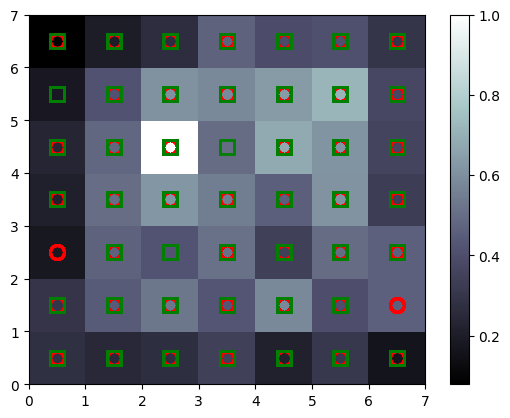

In [18]:
from matplotlib import colors
from pylab import bone, pcolor, colorbar,plot,show

bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']

for i in range(len(X_som_norm)):
  #w=som.winner(X_som_norm)
  w = som.winner(X_som_norm[i].reshape(1, -1))
  plot(w[0]+0.5,
       w[1]+0.5,
       marker= markers[y_som_smote[i]],
       markeredgecolor=colors[y_som_smote[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()





In [19]:
import numpy as np

In [20]:
mapping = som.win_map(X_som_norm)
predicted_label = np.concatenate([np.array(mapping[(2, 4)])])
predicted_label= sc.inverse_transform(predicted_label)

print(predicted_label)


[[ 11.           2.57       155.600006   ...  15.290001     0.993
   -4.5       ]
 [ 10.           1.23       160.699997   ...  21.269999     1.32
   -3.2       ]
 [ 11.           1.22       230.         ...  46.93         2.417
   -4.5       ]
 ...
 [ 10.           3.45755113 152.12755641 ...  17.00799233   0.75548532
   -4.47947784]
 [  9.           0.83080104 168.95699694 ...  15.61600218   1.1408793
   -3.9       ]
 [  9.           0.45072054 166.78073231 ...  15.06427212   1.39712712
   -3.9       ]]


# **Hybrid SOMs with ANN**



In [39]:
df_hybrid= final_df
df_hybrid.head()

,Unnamed: 0,Residue Name,AT,DPX,ASA,Average Bfactor,CX,RMSF,kdHydrophobicity,label
0,0,VAL,7,0.00,93.199997,27.312,6.890000,0.819,4.2,0
1,1,SER,6,0.00,45.600002,31.505,5.820000,0.525,-0.8,0
2,2,ALA,5,2.69,4.800000,28.328,3.250000,0.763,1.8,0
3,3,TYR,12,1.47,118.199997,31.080,14.290001,0.408,-1.3,0
4,4,LEU,8,8.08,33.299999,25.937,2.710000,0.426,3.8,1


In [43]:
df_hybrid= final_df
#df_hybrid.drop('Residue Name', axis=1, inplace=True)
df_hybrid= df_hybrid.rename(columns={'Unnamed: 0':'id'})
df_hybrid.head()

,id,AT,DPX,ASA,Average Bfactor,CX,RMSF,kdHydrophobicity,label
0,0,7,0.00,93.199997,27.312,6.890000,0.819,4.2,0
1,1,6,0.00,45.600002,31.505,5.820000,0.525,-0.8,0
2,2,5,2.69,4.800000,28.328,3.250000,0.763,1.8,0
3,3,12,1.47,118.199997,31.080,14.290001,0.408,-1.3,0
4,4,8,8.08,33.299999,25.937,2.710000,0.426,3.8,1


In [54]:
x_hybrid= df_hybrid.iloc[: ,:8]
y_hybrid= df_hybrid.iloc[:, -1]

In [55]:
x_hybrid_norm = sc.fit_transform(x_hybrid)


In [66]:
print(x_hybrid)

        id  AT    DPX         ASA  Average Bfactor         CX   RMSF  \
0        0   7   0.00   93.199997           27.312   6.890000  0.819   
1        1   6   0.00   45.600002           31.505   5.820000  0.525   
2        2   5   2.69    4.800000           28.328   3.250000  0.763   
3        3  12   1.47  118.199997           31.080  14.290001  0.408   
4        4   8   8.08   33.299999           25.937   2.710000  0.426   
...    ...  ..    ...         ...              ...        ...    ...   
3236  3236   9   1.23  125.699997            0.529   7.790000  0.999   
3237  3237   8  10.45   19.500000            0.421   2.100000  0.411   
3238  3238   9   2.57  129.699997            0.409  12.480000  0.745   
3239  3239   7   4.88   59.299999            0.500   7.470000  0.538   
3240  3240   8   3.49   36.700001            0.471   2.420000  0.446   

      kdHydrophobicity  
0                  4.2  
1                 -0.8  
2                  1.8  
3                 -1.3  
4         

In [65]:
print(x_hybrid_norm)

[[0.00000000e+00 2.00000000e-01 0.00000000e+00 ... 1.18283262e-01
  1.24158923e-01 9.66666667e-01]
 [3.08641975e-04 1.33333333e-01 0.00000000e+00 ... 9.99141631e-02
  7.70586351e-02 4.11111111e-01]
 [6.17283951e-04 6.66666667e-02 3.67235495e-02 ... 5.57939914e-02
  1.15187440e-01 7.00000000e-01]
 ...
 [9.99382716e-01 3.33333333e-01 3.50853242e-02 ... 2.14248927e-01
  1.12303749e-01 6.66666667e-02]
 [9.99691358e-01 2.00000000e-01 6.66211604e-02 ... 1.28240343e-01
  7.91413009e-02 3.22222222e-01]
 [1.00000000e+00 2.66666667e-01 4.76450512e-02 ... 4.15450644e-02
  6.44024351e-02 9.66666667e-01]]


In [57]:
from minisom import MiniSom

som_hybrid = MiniSom(x=8,y=8, input_len=8, sigma=1, learning_rate= 0.5)
som_hybrid.random_weights_init(x_hybrid_norm)
som_hybrid.train_random(data=x_hybrid_norm, num_iteration=100 )

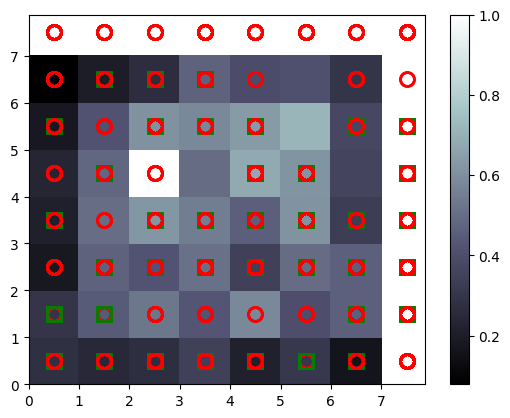

In [59]:
from matplotlib import colors
from pylab import bone, pcolor, colorbar,plot,show

bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']

for i in range(len(x_hybrid_norm)):
    w = som_hybrid.winner(x_hybrid_norm[i].reshape(1, -1))
    plot(w[0]+0.5,
       w[1]+0.5,
       marker= markers[y_hybrid[i]],
       markeredgecolor=colors[y_hybrid[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()

In [67]:
mapping = som_hybrid.win_map(x_hybrid_norm)
predicted_label = np.concatenate([np.array(mapping[(2, 4)])])
predicted_label= sc.inverse_transform(predicted_label)

print(predicted_label)

[[2.4800000e+02 5.0000000e+00 1.4500000e+00 6.2399998e+01 1.5609000e+01
  5.9400000e+00 8.9300000e-01 1.8000000e+00]
 [2.9900000e+02 8.0000000e+00 4.1400000e+00 6.9000000e+01 2.3862000e+01
  6.4900000e+00 5.6200000e-01 1.9000000e+00]
 [3.1000000e+02 5.0000000e+00 4.9300000e+00 2.7900002e+01 2.6480000e+01
  2.6900000e+00 1.0400000e-01 1.8000000e+00]
 [3.1100000e+02 5.0000000e+00 2.7200000e+00 4.8000000e+01 2.9010000e+01
  2.3500000e+00 9.6000000e-02 1.8000000e+00]
 [3.3700000e+02 8.0000000e+00 1.1360001e+01 3.7799999e+01 2.7716000e+01
  3.3700000e+00 4.2200000e-01 1.9000000e+00]
 [3.9700000e+02 5.0000000e+00 1.4600000e+00 2.5900000e+01 3.3267000e+01
  2.4500000e+00 1.0300000e-01 1.8000000e+00]
 [5.3900000e+02 5.0000000e+00 5.0300000e+00 2.5500000e+01 2.9230000e+01
  6.0200000e+00 4.5300000e-01 1.8000000e+00]
 [5.4800000e+02 5.0000000e+00 2.6900000e+00 2.4400000e+01 2.1957000e+01
  4.9000000e-01 2.1600000e-01 1.8000000e+00]
 [6.9300000e+02 5.0000000e+00 1.4600000e+00 1.9299999e+01 2.6682

In [70]:
#creating the matrix of features:
samples = df_hybrid.iloc[: ,1:].values

#creating the dependent variable:
labeled_true = np.zeros(len(df_hybrid))

for i in range(len(df_hybrid)):
  if df_hybrid.iloc[i,0] in predicted_label:
    labeled_true[i]= 1




In [73]:
# train ANN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

ann_hybrid = tf.keras.models.Sequential()
ann_hybrid.add(tf.keras.layers.Dense(units=6,activation = 'relu'))
#ann.add(Dropout(rate=0.3))
ann_hybrid.add(tf.keras.layers.Dense(units=50,activation = 'relu'))
#ann.add(Dropout(rate=0.3))
ann_hybrid.add(tf.keras.layers.Dense(units=6, activation='relu'))
#ann.add(Dropout(rate=0.3))
ann_hybrid.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann_hybrid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann_hybrid.fit(samples,labeled_true, batch_size=1,epochs=5)

Epoch 1/5
3241/3241 [==============================] - 11s 3ms/step - loss: 0.0584 - accuracy: 0.9920
Epoch 2/5
3241/3241 [==============================] - 6s 2ms/step - loss: 0.0297 - accuracy: 0.9963
Epoch 3/5
3241/3241 [==============================] - 8s 3ms/step - loss: 0.0253 - accuracy: 0.9963
Epoch 4/5
3241/3241 [==============================] - 7s 2ms/step - loss: 0.0241 - accuracy: 0.9963
Epoch 5/5
3241/3241 [==============================] - 7s 2ms/step - loss: 0.0218 - accuracy: 0.9963


In [76]:


# prediction the probility of being labeled 1:
prediction_ann_hybrid = ann_hybrid.predict(samples)
prediction_ann_hybrid = np.concatenate((df_hybrid.iloc[:, 0:1].values ,prediction_ann_hybrid), axis=1)
prediction_ann_hybrid= prediction_ann_hybrid[prediction_ann_hybrid[:,1].argsort()]



102/102 [==============================] - 0s 3ms/step


In [77]:
print(prediction_ann_hybrid)

[[1.12700000e+03 4.27265948e-22]
 [2.27600000e+03 1.08833344e-16]
 [2.15400000e+03 5.31120532e-15]
 ...
 [1.52400000e+03 9.51760784e-02]
 [1.55900000e+03 9.61917713e-02]
 [5.48000000e+02 1.15416601e-01]]
